# Decision Tree: Heart Deceased Prediction

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Import Data

In [143]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.rename(columns={"target":"HD"},inplace=True)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HD
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Missing Values Indentification
##### Fortunetly we dont have missing values in our dataset and all columns are having appropriate data types as well. 

##### take a note that even data types of sex,cp,fbs,restcg,exang,slope,thal,HD are showing int or float but in real these are the catogories which are converted into numbers

In [46]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  HD        303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

In [47]:
for i in df.columns:
    print(i,"=>",df[i].unique())
    print()
    

age => [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

sex => [1 0]

cp => [3 2 1 0]

trestbps => [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

chol => [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 1

### One Hot Encoding

#### lets convert column of catagorical data(having more than 2 unique values into columns of binary values, as models can only handle numerical data.

In [70]:
df_dummies=pd.get_dummies(df,columns=["cp","restecg","slope","thal"])
df_dummies.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,HD,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


### Splitting the Data into Training and Testing Set

In [71]:
X=df_dummies.drop("HD",axis=1)
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [72]:
y=df_dummies["HD"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: HD, dtype: int64

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


### Build A Decision Tree

In [74]:
model=DecisionTreeClassifier(random_state=42)
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

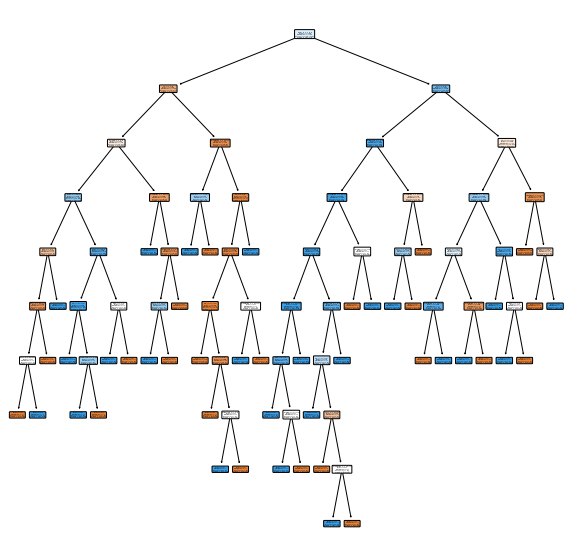

In [75]:
plt.figure(figsize=(10,10))
plot_tree(model,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X.columns);

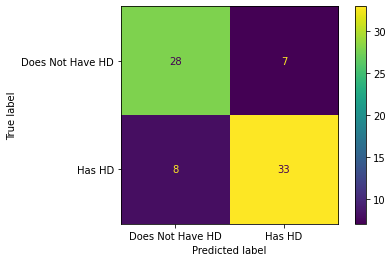

In [76]:
plot_confusion_matrix(model,X_test,y_test,display_labels=["Does Not Have HD","Has HD"])

In [77]:
confusion_matrix(y_test,y_pred)

array([[28,  7],
       [ 8, 33]], dtype=int64)

In [112]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result["Score"]=np.where(result["y_test"]==result["y_pred"],1,0)
result["Score"].sum()/result.shape[0]


0.8289473684210527

### Hyper Parameter Tuning

In [79]:
path=model.cost_complexity_pruning_path(X_train,y_train)
path=path.ccp_alphas[:-1]
alpha=[]
for ccp in path:
    model=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp)
    scores=cross_val_score(model,X_train,y_train,cv=5)
    alpha.append([ccp,np.mean(scores),np.std(scores)])

    

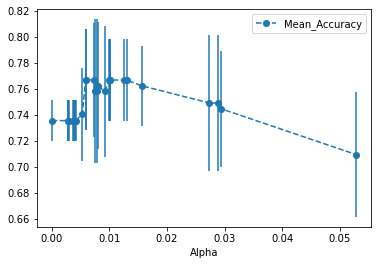

In [80]:
alpha_results=pd.DataFrame(alpha,columns=["Alpha","Mean_Accuracy","Std.Dev"])
alpha_results.plot(x="Alpha",y="Mean_Accuracy",yerr="Std.Dev",marker="o",linestyle="--")

In [81]:
Max_accu_Alpha=alpha_results[(alpha_results["Alpha"]>0.010)&(alpha_results["Alpha"]<0.015)]
Max_accu_Alpha

,Alpha,Mean_Accuracy,Std.Dev
19,0.010040,0.766763,0.031144
20,0.010069,0.766763,0.031144
21,0.012579,0.766763,0.031144
22,0.012976,0.766763,0.031144


In [97]:
Max_accu_Alpha[2:3]["Alpha"]

21    0.012579
Name: Alpha, dtype: float64

In [106]:
Max_Alpha=float(Max_accu_Alpha[2:3]["Alpha"])

### Tuned Model

In [100]:
model_tuned=DecisionTreeClassifier(random_state=42,ccp_alpha=Max_Alpha)
model_tuned=model_tuned.fit(X_train,y_train)


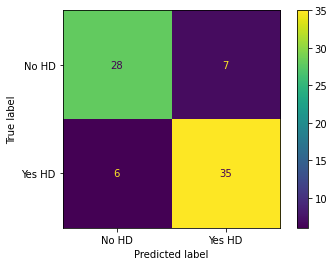

In [113]:
plot_confusion_matrix(model_tuned,X_test,y_test,display_labels=["No HD","Yes HD"])

In [114]:
from sklearn.model_selection import GridSearchCV


In [110]:
from sklearn.metrics import accuracy_score
y_pred=model_tuned.predict(X_test)
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result["Score"]=np.where(result["y_test"]==result["y_pred"],1,0)
result["Score"].sum()/result.shape[0]

0.8289473684210527

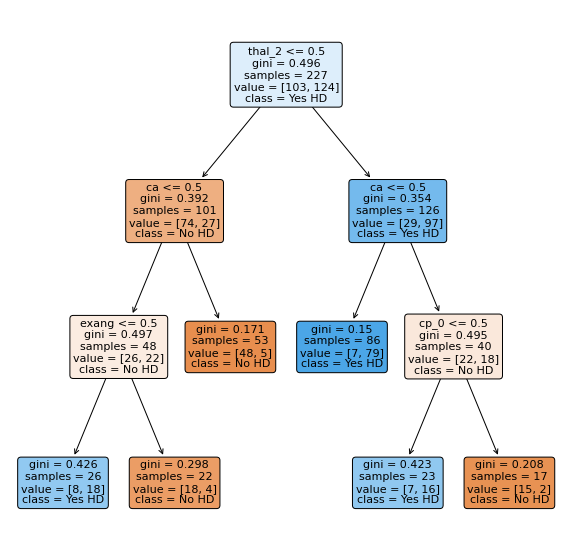

In [131]:
plt.figure(figsize=(10,10))
plot_tree(model_tuned,filled=True,rounded=True,class_names=["No HD","Yes HD"],feature_names=X.columns);

## Hyper Parameter Tuning Using GridsearchCV

In [119]:
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(DecisionTreeClassifier(random_state=0),{"ccp_alpha":path},cv=5,return_train_score=False)

clf.fit(X,y)

clf.cv_results_

{'mean_fit_time': array([0.00930457, 0.        , 0.00988193, 0.00625305, 0.00625005,
        0.00355163, 0.00312824, 0.00513258, 0.00685306, 0.        ,
        0.0096766 , 0.00450253, 0.00470271, 0.00470266, 0.00460262,
        0.00450249, 0.00460267, 0.00450244, 0.00450258, 0.00440254,
        0.00470266, 0.00460243, 0.00450249, 0.00460272, 0.00460286,
        0.00460296, 0.00470567, 0.00530357]),
 'std_fit_time': array([7.69032242e-03, 0.00000000e+00, 8.12062266e-03, 7.65839499e-03,
        7.65471393e-03, 5.15567763e-03, 6.25648499e-03, 6.52963246e-03,
        8.44701253e-03, 0.00000000e+00, 7.92003901e-03, 3.69356475e-07,
        2.45456882e-04, 2.45593200e-04, 2.00772363e-04, 3.50402318e-07,
        2.00391007e-04, 3.87384339e-07, 3.16297988e-07, 1.99866373e-04,
        2.45593200e-04, 2.00391064e-04, 2.78041453e-07, 1.99771119e-04,
        2.00295640e-04, 2.00486261e-04, 2.42797315e-04, 8.71819548e-04]),
 'mean_score_time': array([0.0009017 , 0.        , 0.00050039, 0.        , 

In [132]:
clf.best_score_

0.781912568306011

In [133]:
clf.best_params_

{'ccp_alpha': 0.015627803137520685}

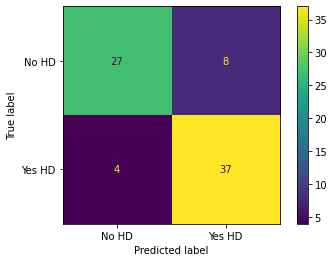

In [134]:
model_tuned=DecisionTreeClassifier(random_state=42,ccp_alpha=0.015627803137520685)
model_tuned=model_tuned.fit(X_train,y_train)
plot_confusion_matrix(model_tuned,X_test,y_test,display_labels=["No HD","Yes HD"])


In [136]:
y_pred=model_tuned.predict(X_test)
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result["Score"]=np.where(result["y_test"]==result["y_pred"],1,0)
result["Score"].sum()/result.shape[0]

0.8421052631578947